In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sms
from scipy.stats import pearsonr
import pingouin as pg
from functools import reduce

/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Tannin data

In [2]:
tan14 = pd.read_csv("../data/nir_SC_2014.txt", sep='\t', lineterminator='\n')
tan14 = tan14[["taxa", "Tannin"]]
tan14_mean = tan14.groupby("taxa").mean()
print(tan14_mean)
tan14_mean_zeroFilter = tan14_mean.loc[tan14_mean.Tannin < 0, "Tannin"] = 0
print(tan14_mean_zeroFilter)

            Tannin
taxa              
PI152651   9.17200
PI17548   35.49000
PI24969   -2.78700
PI329435  -0.48000
PI329440  -8.63350
...            ...
PI659691  -0.31350
PI659694   0.28400
PI659695  -4.79250
PI659696  31.03350
PI659753  -9.17675

[368 rows x 1 columns]
0


/home/lkshiel/.conda/envs/python3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
tan13 = pd.read_csv("../data/nir_SC_2013.txt", sep='\t', lineterminator='\n')
tan13 = tan13[["taxa", "Tannins"]]
tan13_mean = tan13.groupby("taxa").mean()
print(tan13_mean)

          Tannins
taxa             
PI152651   3.4160
PI17548   21.8940
PI24969    0.0000
PI329440   0.0000
PI34911   13.2790
...           ...
PI659691   0.0000
PI659694   0.0000
PI659695   0.0000
PI659696  29.5875
PI659753   0.0000

[333 rows x 1 columns]


In [4]:
dfs = [tan14_mean, tan13_mean]
all_tan = reduce(lambda left, right: pd.merge(left, right, on = "taxa"), dfs)
all_tan = all_tan.rename(columns = {'taxa':'PI',
                                    'Tannin':'Tan_14', 'Tannins':'Tan_13'})
print(all_tan.shape)
all_tan.head()

(327, 2)


,Tan_14,Tan_13
taxa,,
PI152651,9.172,3.416
PI17548,35.490,21.894
PI24969,0.000,0.000
PI329440,0.000,0.000
PI34911,5.160,13.279


# Clostridium 

In [16]:
clostridium_df = pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Clostridium")
clostridium_df.head()

,Unnamed: 0,Sample ID,TP_r1,TP_r2,TP_avg,cp_inhibitionZone,cp_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,0,p0101-M1,412.005,>420.000,412.0050,0,0.0,PI533876,Caudatum,Nigeria,KA 12 Janjari,R,1.0,0
1,1,p0101-M2,320.088,325.318,322.7030,0,0.0,PI656116,NaN,Mali,SC 1506,R,1.0,0
2,2,p0102-M1,>420.000,>420.000,420.0000,0,0.0,PI576350,Kafir-Caudatum,USA,SAP-417,R,1.0,4
3,3,p0102-M2,>420.000,>420.000,420.0000,0,0.0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
4,4,p0103-M2,413.011,414.75,413.8805,0,0.0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND


In [17]:
clostridium_df = clostridium_df[["cp_AMA", "PI","Testa","TP_avg"]]
clostridium_df.head()

,cp_AMA,PI,Testa,TP_avg
0,0.0,PI533876,1.0,412.0050
1,0.0,PI656116,1.0,322.7030
2,0.0,PI576350,1.0,420.0000
3,0.0,PI641849,1.0,420.0000
4,0.0,PI533877,0.0,413.8805


In [18]:
ama_mean = clostridium_df.groupby("PI").mean()
ama_mean.reset_index(inplace=True)
ama_mean.head()

,PI,cp_AMA,Testa,TP_avg
0,PI152651,0.000,1.0,294.73100
1,PI17548,0.000,0.0,420.00000
2,PI24969,1.775,0.0,292.25900
3,PI329435,1.775,0.0,210.67500
4,PI329440,4.400,0.0,275.53875


In [19]:
tan_and_ama = all_tan.merge(ama_mean, left_on = "taxa", right_on ="PI")
tan_and_ama.head()

,Tan_14,Tan_13,PI,cp_AMA,Testa,TP_avg
0,9.172,3.416,PI152651,0.000,1.0,294.73100
1,35.490,21.894,PI17548,0.000,0.0,420.00000
2,0.000,0.000,PI24969,1.775,0.0,292.25900
3,0.000,0.000,PI329440,4.400,0.0,275.53875
4,5.160,13.279,PI34911,1.775,1.0,317.42900


# T-Test

In [20]:
x = tan_and_ama.Tan_14
y = tan_and_ama.Tan_13
pg.ttest(x, y, correction='auto')

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.330267,630,two-sided,0.183912,"[-0.59, 3.09]",0.10583,0.21,0.264288


# Testa

In [21]:
mean_tan_13_14 = tan14_mean.merge(tan13_mean, on = "taxa")
print(mean_tan_13_14)

           Tannin  Tannins
taxa                      
PI152651   9.1720   3.4160
PI17548   35.4900  21.8940
PI24969    0.0000   0.0000
PI329440   0.0000   0.0000
PI34911    5.1600  13.2790
...           ...      ...
PI659691   0.0000   0.0000
PI659694   0.2840   0.0000
PI659695   0.0000   0.0000
PI659696  31.0335  29.5875
PI659753   0.0000   0.0000

[327 rows x 2 columns]


In [22]:
min_tan= mean_tan_13_14.groupby("taxa").mean()
print(min_tan)

           Tannin  Tannins
taxa                      
PI152651   9.1720   3.4160
PI17548   35.4900  21.8940
PI24969    0.0000   0.0000
PI329440   0.0000   0.0000
PI34911    5.1600  13.2790
...           ...      ...
PI659691   0.0000   0.0000
PI659694   0.2840   0.0000
PI659695   0.0000   0.0000
PI659696  31.0335  29.5875
PI659753   0.0000   0.0000

[327 rows x 2 columns]


In [23]:
col =mean_tan_13_14.loc[: , "Tannin":"Tannins"]
mean_tan_13_14['tannin_mean']=col.mean(axis=1)
mean_tan_13_14

,Tannin,Tannins,tannin_mean
taxa,,,
PI152651,9.1720,3.4160,6.2940
PI17548,35.4900,21.8940,28.6920
PI24969,0.0000,0.0000,0.0000
PI329440,0.0000,0.0000,0.0000
PI34911,5.1600,13.2790,9.2195
...,...,...,...
PI659691,0.0000,0.0000,0.0000
PI659694,0.2840,0.0000,0.1420
PI659695,0.0000,0.0000,0.0000


In [24]:
mean_tan_and_ama = mean_tan_13_14.merge(ama_mean, left_on = "taxa", right_on ="PI")
mean_tan_and_ama

,Tannin,Tannins,tannin_mean,PI,cp_AMA,Testa,TP_avg
0,9.1720,3.4160,6.2940,PI152651,0.000,1.0,294.73100
1,35.4900,21.8940,28.6920,PI17548,0.000,0.0,420.00000
2,0.0000,0.0000,0.0000,PI24969,1.775,0.0,292.25900
3,0.0000,0.0000,0.0000,PI329440,4.400,0.0,275.53875
4,5.1600,13.2790,9.2195,PI34911,1.775,1.0,317.42900
...,...,...,...,...,...,...,...
311,0.0000,0.0000,0.0000,PI659691,0.000,0.0,187.63575
312,0.2840,0.0000,0.1420,PI659694,0.000,0.0,204.11050
313,0.0000,0.0000,0.0000,PI659695,0.000,0.0,262.61350
314,31.0335,29.5875,30.3105,PI659696,0.000,1.0,420.00000


# Figure S3

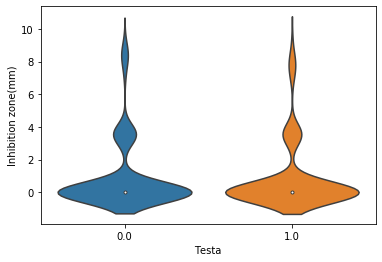

In [ ]:
testa_ama_violin=sns.violinplot(x="Testa", y="cp_AMA", data=clostridium_df)
testa_ama_violin.set(ylabel="Inhibition zone(mm)")
plt.xticks([0,1])
testa_ama_violin.figure.savefig("testa_ama_violin.png", bbox_inches='tight', dpi=600)

# Figure2a

In [ ]:
tp_ama_joint = sns.jointplot(x="cp_AMA", y="TP_avg", data=mean_tan_and_ama, kind="reg", stat_func=R2, color="darkseagreen").annotate(stats.pearsonr)
tp_ama_joint.set_axis_labels( "Inhibition Zone (mm)","Total phenol [GAE/g]]")
tp_ama_joint.savefig("tp_ama_joint.png", bbox_inches='tight', dpi=600)

# Figure2b

In [ ]:
tan_ama_joint = sns.jointplot(x="cp_AMA", y="tannin_mean", data=mean_tan_and_ama, kind="reg", stat_func=R2, color="darkseagreen").annotate(stats.pearsonr)
tan_ama_joint.set_axis_labels( "Inhibition Zone (mm)","Tannins [mg of CE/g]")
tan_ama_joint.savefig("tan_ama_joint.png", bbox_inches='tight', dpi=600)

# Salmonella 

In [ ]:
salmonella_df=pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Salmonella")
salmonella_df.head()

In [ ]:
salmonella_df.dropna(inplace=True)
salmonella_df["Testa"] = salmonella_df.Testa.astype(int)
salmonella_df.Tannins.replace("ND", 0, inplace=True)
salmonella_df.head()

# Table S2

In [ ]:
pd.crosstab(np.array(salmonella_df.Testa), 
            [np.array(salmonella_df.se_AMA)])

In [ ]:
se_mean = salmonella_df.groupby("PI").mean()
se_mean.reset_index(inplace=True)
se_mean.head()

In [ ]:
tan_and_se = all_tan.merge(se_mean, left_on = "taxa", right_on ="PI")
tan_and_se.head()

In [ ]:
mean_tan_and_seama = mean_tan_13_14.merge(se_mean, left_on = "taxa", right_on ="PI")
mean_tan_and_seama

# Figure S2

In [ ]:
sns.set_style("white")
se_joint = sns.jointplot(x="se_AMA", y="tannin_mean", data=mean_tan_and_seama, kind="reg", stat_func=R2, color="coral").annotate(stats.pearsonr)
se_joint.set_axis_labels( "Antimicrobial activity","Tannins [mg of CE/g]")
plt.xticks([0,0.5,1])
se_joint.savefig("se_joint.png", bbox_inches='tight', dpi=600)

# Figure S1

In [ ]:
sns.set_style("white")
se_TP_joint = sns.jointplot(x="se_AMA", y="TP_avg", data=mean_tan_and_seama, kind="reg", stat_func=R2, color="coral").annotate(stats.pearsonr)
se_TP_joint.set_axis_labels( "Antimicrobial activity","Total phenol [GAE/g]")
plt.xticks([0,0.5,1])
se_TP_joint.savefig("se_TP_joint.png", bbox_inches='tight', dpi=600)

# Germplasm filtering

In [ ]:
ama = list(clostridium_df["cp_AMA"])
new_ama = []
for i in ama:
    if i < 1:
        new_ama.append("none")
    if ((i >3.5) and (i<4)):
        new_ama.append("weak")
    if (i>=4):
        new_ama.append("strong")
clostridium_df["AMA"] = new_ama
set(new_ama)

In [ ]:
rep_agreement = clostridium_df.groupby("PI").min()
rep_agreement = rep_agreement[rep_agreement["cp_AMA"] != 0]
print(rep_agreement)

# Table 3

In [ ]:
pd.crosstab(np.array(clostridium_df.Testa), 
            [np.array(clostridium_df.AMA)])

In [ ]:
strong = rep_agreement[rep_agreement.AMA.str.contains("strong", case=False)]
print(strong)

In [ ]:
pis = ["PI533869","PI533871","PI533940","PI533948","PI533979",
       "PI534114","PI534115","PI542406","PI576393","PI595739",
       "PI597957","PI597972","PI641836","PI642998","PI655980",
       "PI655983","PI655995","PI656014","PI656088","PI656112"]

In [ ]:
pi_values = clostridium_df[clostridium_df.PI.isin(pis)].sort_values(by="PI")
print(pi_values.PI.unique())

# Compositional data

In [ ]:
nir_raw = pd.read_excel("../data/Supplemental_F1.xlsx", index_col=0)
columns = ["_".join(i.split()) for i in list(nir_raw.columns)]
nir_raw.columns = columns
nir_raw.head()

In [ ]:
numeric_columns = nir_raw.columns[3:len(nir_raw.columns)-4]

In [ ]:
fl17_ama = pd.read_excel("../data/Supplemental_F1.xlsx", index_col=0)
print(fl17_ama.shape)
fl17_ama.head()

In [ ]:
 def r(x, y):
     return stats.pearsonr(x, y)

 p_values = []

 for i in list(numeric_columns.values):
     if i not in ["Sodium"]:
         sns.jointplot(x="cp_AMA", 
                       y=i, 
                       data=fl17_ama, 
                       kind="reg", 
                       marginal_kws=dict(kde=False), 
                       stat_func=r)
         p_values.append(r(fl17_ama.cp_AMA, fl17_ama.loc[:,i]))
         plt.show()

In [ ]:
corr_pval = pd.DataFrame(p_values, columns=["r","pvalue"])
corr_pval.head()

In [ ]:
sms.stats.multipletests(corr_pval["pvalue"], alpha=0.05, method="fdr_bh")

# Comparing GWAS

In [ ]:
amGWAS = pd.read_csv("/panicle/lindsay/gemma/thin/output/plink.pruned.assoc.txt", sep='\t', lineterminator='\n')
amGWAS= amGWAS[["rs", "p_wald"]]
amGWAS.head()

In [ ]:
tcGWAS = tcGWAS = pd.read_csv("/panicle/lindsay/gemma_tan_covariate/output/plink.pruned_ama_tan_BLUP.assoc.txt", sep='\t', lineterminator='\n')
tcGWAS = tcGWAS[["rs", "p_wald"]]
tcGWAS.head()

In [ ]:
dfs = [amGWAS, tcGWAS]

gwas = reduce(lambda left, right: pd.merge(left, right, on = "rs"), dfs)

gwas.head()


In [ ]:
x = gwas.p_wald_x
y = gwas.p_wald_y
pg.ttest(x, y, correction='auto')

# Figure S7

In [2]:
df= pd.read_csv("../data/cp_ama_genotypes.csv")
df = df.rename(columns={"Unnamed: 0":"PI", "0":"S2_8924006", "1":"S10_56476103"})
df = df[df.S10_56476103 != "0/1"]
df.head()

,PI,cp_AMA,S2_8924006,S10_56476103
0,pi152651,0.000,0/0,./.
1,pi17548,0.000,0/0,0/0
2,pi24969,1.775,0/0,./.
3,pi329435,1.775,0/0,./.
4,pi329440,4.400,0/0,0/0


In [3]:
df= df.replace({"./.": np.nan})
df.S2_8924006 = df.S2_8924006.replace({"0/0":"T/T", "1/1":"C/C"})
df.S10_56476103 = df.S10_56476103.replace({"0/0":"G/G", "1/1":"T/T"})
df.head()
df.shape

(362, 4)

[Text(0, 0.5, 'Inhibition zone (mm)')]

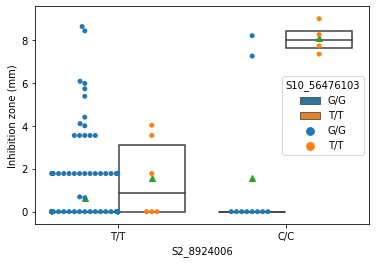

In [4]:
ax = snpplot = sns.swarmplot(x="S2_8924006", y="cp_AMA", hue="S10_56476103", data = df,
                       dodge=True)
ax =sns.boxplot(x="S2_8924006", y="cp_AMA", hue = "S10_56476103", data=df, 
                showmeans=True,showcaps=False,boxprops={'facecolor':'None'},
                 showfliers=False,whiskerprops={'linewidth':0}, ax=ax)
ax.set(ylabel="Inhibition zone (mm)")
